In [13]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [14]:
entries = os.listdir('./wavfiles')

In [18]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n,d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y,freq)


# calculate the envelope of a signal

def envelope(y,rate,threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10),min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [36]:
df = pd.read_csv('instruments.csv')

In [37]:
df.columns

Index(['fname', 'label'], dtype='object')

In [38]:
df.set_index('fname',inplace=True)

In [39]:
for f in df.index:
    rate,signal = wavfile.read('./wavfiles/'+ f )
    df.at[f,'length'] = signal.shape[0]/rate

In [40]:
df.head()

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24


In [41]:
classes = list(np.unique(df.label))

In [42]:
class_dist = df.groupby(['label'])['length'].mean()

In [43]:
class_dist

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

([<matplotlib.patches.Wedge at 0x1642df8a7c8>,
 [Text(-0.45877110635074414, 0.9997645082606775, 'Acoustic_guitar'),
  Text(-0.9137754506592002, 0.6123842141765052, 'Bass_drum'),
  Text(-1.0857970079296277, 0.17619550950880689, 'Cello'),
  Text(-0.9336627503536192, -0.5816131606163286, 'Clarinet'),
  Text(-0.4352497788702751, -1.0102265240991135, 'Double_bass'),
  Text(0.3149400446529656, -1.0539510274552553, 'Flute'),
  Text(0.923785773738729, -0.5971765603554261, 'Hi-hat'),
  Text(1.0969027904297008, 0.08248798911075382, 'Saxophone'),
  Text(0.7950454349321914, 0.7601991557437319, 'Snare_drum'),
  Text(0.3044836402351127, 1.0570192584949314, 'Violin_or_fiddle')],
 [Text(-0.25023878528222404, 0.545326095414915, '13.7%'),
  Text(-0.4984229730868364, 0.33402775318718464, '3.8%'),
  Text(-0.5922529134161606, 0.09610664155025829, '9.9%'),
  Text(-0.509270591101974, -0.31724354215436107, '13.0%'),
  Text(-0.23740897029287727, -0.5510326495086073, '6.3%'),
  Text(0.17178547890161758, -0.5748

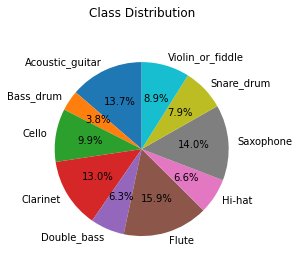

In [44]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)

In [45]:
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [46]:
signals={}
fft={}
fbank={}
mfccs={}


In [48]:
for index, c in enumerate(classes, start=1):
    for c in classes:

        wav_file = df.iloc[index,0]
        wav_file = df[df.label == c].iloc[0,0]
        print(wav_file)
        new_signal,new_rate = librosa.load('./wavfiles/' + wav_file,sr=44100)
        mask = envelope(new_signal,new_rate,0.0005)
        new_signal = new_signal[mask]
        signals[c] = new_signal

        fft[c] = calc_fft(new_signal,rate)
        bank = logfbank(new_signal[:rate], rate, nfilt=26, nfft=1103).T
        fbank[c]= bank
        mel = mfcc(new_signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
        mfccs[c] = mel

17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav
5388d14d.wav
229be2be.wav
d6144e01.wav
17f82c05.wav
52e54bdd.wav
e2d993ec.wav
a64a3740.wav
e6597186.wav
18865530.wav
078f7ac0.wav

In [49]:
df.head()

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24


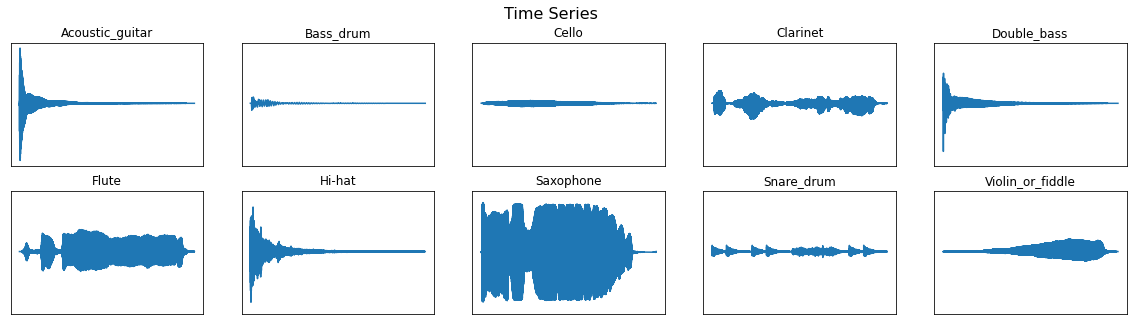

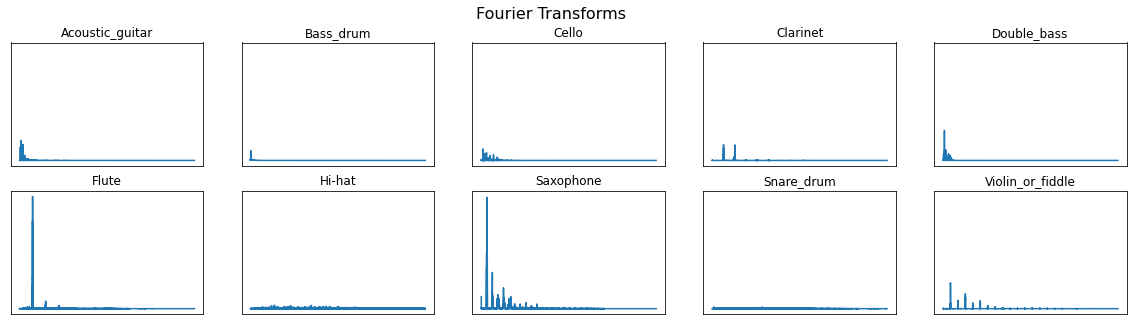

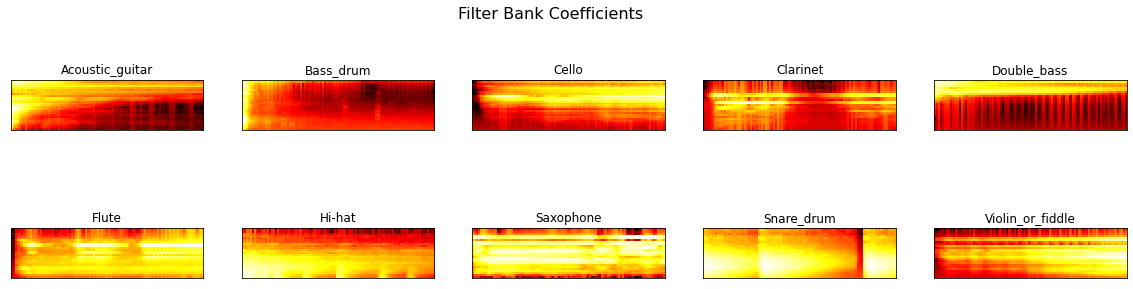

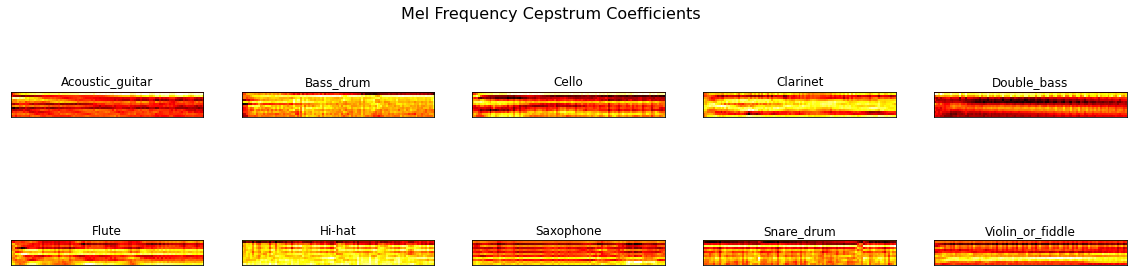

In [50]:
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [54]:
if len(os.listdir('cleaned')) == 0:
    for f in tqdm(df.fname):
        final_signal,final_rate = librosa.load('./wavfiles/' +f, sr=16000)
        mask = envelope(final_signal,final_rate,0.0005)
        wavfile.write(filename='./cleaned/' +f,rate=final_rate,data=final_signal)

100%|████████████████████████████████████████| 300/300 [00:45<00:00,  6.65it/s]
